In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

shimanovsk ru
nikolskoye ru
grand centre ca
port-gentil ga
hilo us
bredasdorp za
peniche pt
doha kw
dingle ie
campoverde pe
atuona pf
belushya guba ru
ribeira grande pt
samarai pg
santa pe
estelle us
hobart au
nangong cn
ushuaia ar
champerico gt
jomalig ph
mar del plata ar
charagua bo
jamestown sh
san rafael ph
inhambane mz
mmabatho za
avarua ck
kerteh my
cherskiy ru
puerto ayora ec
bengkulu id
peniche pt
mount isa au
mataura pf
tumannyy ru
mahajanga mg
punta arenas cl
todos santos cuchumatan gt
punta arenas cl
busselton au
esperance au
bredasdorp za
talnakh ru
sol-iletsk ru
leshukonskoye ru
jamestown sh
vaini to
yellowknife ca
butaritari ki
bluff nz
iquitos pe
luderitz na
tasiilaq gl
naze jp
punta arenas cl
conde br
busselton au
puerto ayora ec
rikitea pf
hermanus za
hobart au
atuona pf
hithadhoo mv
hilo us
mataura pf
tuktoyaktuk ca
rikitea pf
volodarsk ru
vaini to
poum nc
atuona pf
tala eg
kapaa us
kodiak us
hobart au
atuona pf
rikitea pf
dovers vc
barrow us
vestmannaeyjar is
saint-p

olinda br
flinders au
narsaq gl
kapaa us
ostrovnoy ru
hilo us
attawapiskat ca
itoman jp
bambous virieux mu
caravelas br
khatanga ru
saint-philippe re
ushuaia ar
punta arenas cl
maunabo us
hobart au
port hardy ca
kodiak us
sao filipe cv
halalo wf
mataura pf
gostinu ro
atuona pf
kerouane gn
nishihara jp
taolanaro mg
bluff nz
saint-pierre pm
port alfred za
kodiak us
nikolskoye ru
yellowknife ca
taolanaro mg
ushuaia ar
vaini to
mataura pf
agirish ru
khatanga ru
banff ca
kapaa us
hobart au
mehran ir
taolanaro mg
ushuaia ar
bambous virieux mu
kapaa us
savinskiy ru
fort nelson ca
bunia cd
longyearbyen sj
bluff nz
belushya guba ru
beyneu kz
lawton us
jamestown sh
chuy uy
longyearbyen sj
hermanus za
ushuaia ar
faya td
great bend us
hobart au
guerrero mx
busselton au
mataura pf
saint george bm
dingle ie
avarua ck
la troncal ec
attawapiskat ca
lenoir city us
carnarvon au
naron es
tabas ir
northam au
gander ca
tuktoyaktuk ca
port alfred za
carnarvon au
san quintin mx
mataura pf
masyaf sy
kapaa us


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?&units=Imperial&APPID=" + weather_api_key


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

print(weather_api_key) 

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------
8c54de1cd0f05d77fe9a6451e17e880e


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url) 
    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


print(len(city_data))

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [8]:
print(city_data[0])

{'City': 'Shimanovsk', 'Lat': 52, 'Lng': 127.7, 'Max Temp': 31.1, 'Humidity': 53, 'Cloudiness': 0, 'Wind Speed': 7.87, 'Country': 'RU', 'Date': '2021-04-24 19:20:14'}


In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shimanovsk,52.0000,127.7000,31.10,53,0,7.87,RU,2021-04-24 19:20:14
1,Nikolskoye,59.7035,30.7861,39.20,70,20,4.47,RU,2021-04-24 19:20:15
2,Port-Gentil,-0.7193,8.7815,82.40,83,75,5.75,GA,2021-04-24 19:20:15
3,Hilo,19.7297,-155.0900,71.60,83,90,6.91,US,2021-04-24 19:20:16
4,Bredasdorp,-34.5322,20.0403,53.60,87,96,3.44,ZA,2021-04-24 19:20:16
5,Peniche,39.3558,-9.3811,66.00,69,100,8.01,PT,2021-04-24 19:20:16
6,Doha,25.2867,51.5333,84.99,51,0,2.30,QA,2021-04-24 19:17:26
7,Dingle,10.9995,122.6711,76.06,85,100,1.12,PH,2021-04-24 19:20:17
8,Campoverde,-8.4753,-74.8058,89.60,62,40,8.05,PE,2021-04-24 19:20:17
9,Atuona,-9.8000,-139.0333,80.74,72,0,20.49,PF,2021-04-24 19:20:18


In [10]:
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shimanovsk,RU,2021-04-24 19:20:14,52.0000,127.7000,31.10,53,0,7.87
1,Nikolskoye,RU,2021-04-24 19:20:15,59.7035,30.7861,39.20,70,20,4.47
2,Port-Gentil,GA,2021-04-24 19:20:15,-0.7193,8.7815,82.40,83,75,5.75
3,Hilo,US,2021-04-24 19:20:16,19.7297,-155.0900,71.60,83,90,6.91
4,Bredasdorp,ZA,2021-04-24 19:20:16,-34.5322,20.0403,53.60,87,96,3.44
...,...,...,...,...,...,...,...,...,...
558,Floriano,BR,2021-04-24 19:23:36,-6.7669,-43.0225,83.88,72,100,3.60
559,Orapa,BW,2021-04-24 19:23:36,-21.2833,25.3667,66.00,24,0,1.10
560,Peace River,CA,2021-04-24 19:23:37,56.2501,-117.2860,35.60,32,75,18.41
561,Paka,MY,2021-04-24 19:23:37,4.6374,103.4368,77.00,100,99,3.15


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/24/21'

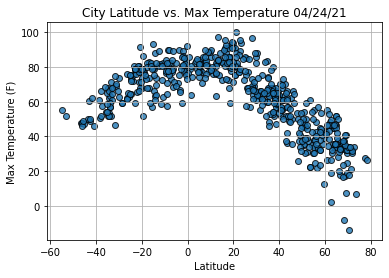

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

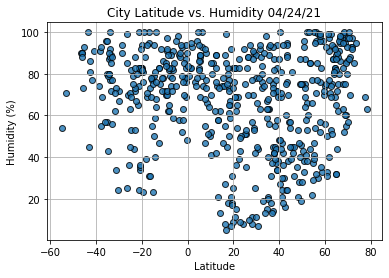

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

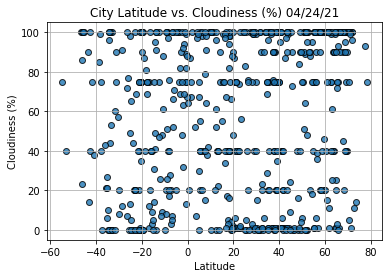

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

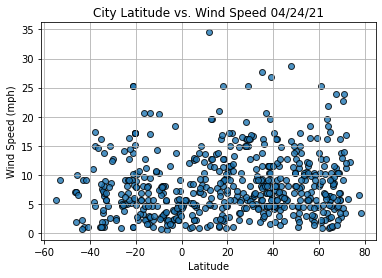

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

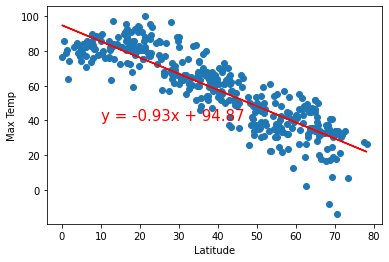

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

 # Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

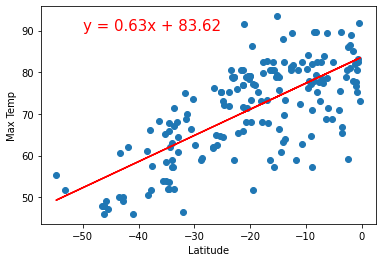

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

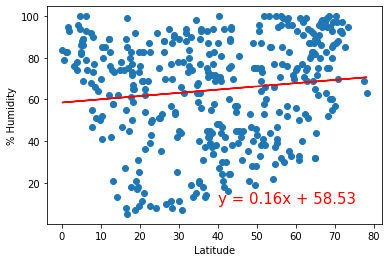

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

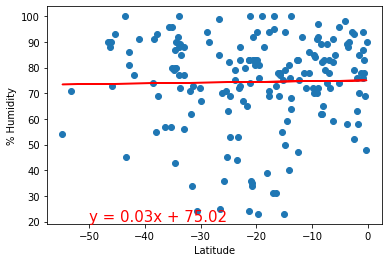

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

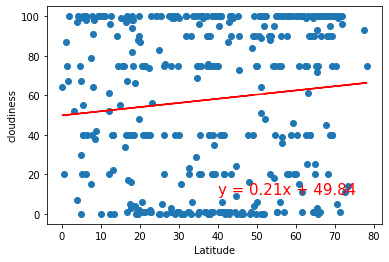

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for cloudiness', 'cloudiness',(40,10))

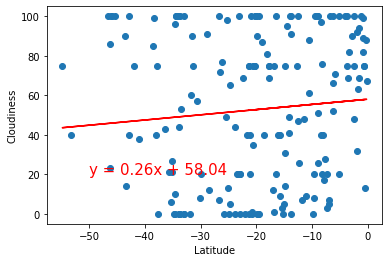

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,20))

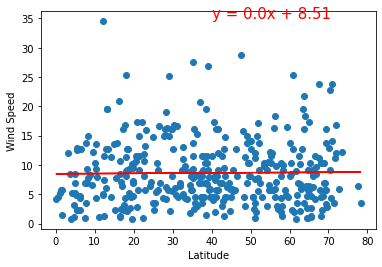

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

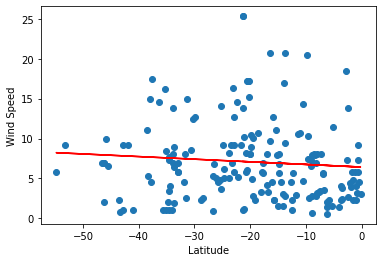

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))